# main_strategy

> This module contains the main strategy to predict half hourly prices from hourly prices.

## Strategy Explanation

Main strategy finds half hourly prices by averaging two consequtive prices and multiplying with a constant value.

$$ s_j = (s_i + s_{i+1})/2 * 0.98 $$ where $$ j = i + 0.5 $$  and $$ i \in [0, 1, 2, ..., 22] $$

In [ ]:
#| default_exp main_strategy

Get data and make transformations.

In [ ]:
#| export
import pandas as pd
import numpy as np

In [ ]:
from nbdev_demo.data_handler import *

In [ ]:
data = some_api_call()
df = transform_data(data)
df = convert_to_float(df)
df.head()

,time,price
0,0,45.0
1,1,37.0
2,2,35.0
3,3,30.0
4,4,31.0


Start creating the logic.

In [ ]:
half_hourly_prices = []
for ind, row in df.iterrows():
    if ind != len(df) - 1:
        half_hourly_prices.append(row['price'])
        half_hourly_prices.append((row['price'] + df.loc[ind+1, 'price']) / 2 * 0.98)
    else:
        half_hourly_prices.append(row['price'])
        half_hourly_prices.append(row['price'])

In [ ]:
import matplotlib.pyplot as plt

<matplotlib.collections.PathCollection>

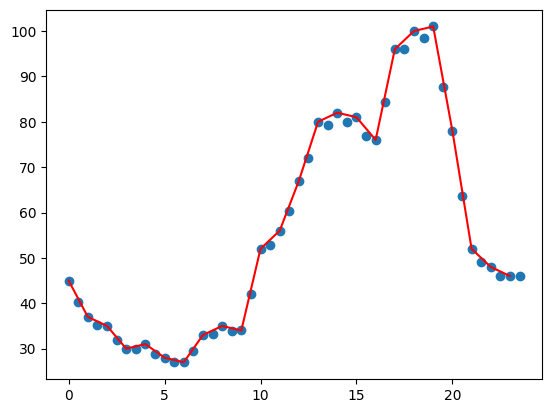

In [ ]:
plt.plot(df.index, df['price'], color='red')
plt.scatter(np.linspace(0, 24, 49)[0:-1], half_hourly_prices)

In [ ]:
#| export

def predict_prices(df: pd.DataFrame # Dataframe contains hourly prices
                  ):
    """Predict half hourly prices based on hourly prices."""
    hhp = []
    for ind, row in df.iterrows():
        if ind != len(df) - 1:
            hhp.append(row['price'])
            hhp.append((row['price'] + df.loc[ind+1, 'price']) / 2 * 0.98)
        else:
            hhp.append(row['price'])
            hhp.append(row['price'])
    return pd.DataFrame({'time': np.linspace(0, 24, 49)[0:-1],
                         'prices': hhp})

Create half hourly prices

In [ ]:
half_hourly_prices = predict_prices(df)
half_hourly_prices.head()

,time,prices
0,0.0,45.00
1,0.5,40.18
2,1.0,37.00
3,1.5,35.28
4,2.0,35.00


In [ ]:
#| hide
# Some Tests

In [ ]:
#| hide
assert len(half_hourly_prices) == 48

In [ ]:
#| hide
assert half_hourly_prices['prices'].dtype == float

In [ ]:
#| hide
import nbdev; nbdev.nbdev_export()